In [5]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
base_2022 = pd.read_excel(r'C:\Users\gusta\OneDrive\Área de Trabalho\Pos_Data_Analytics_FIAP\Fiap\Datathon\Base\BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name = 'PEDE2022')
base_2023 = pd.read_excel(r'C:\Users\gusta\OneDrive\Área de Trabalho\Pos_Data_Analytics_FIAP\Fiap\Datathon\Base\BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name = 'PEDE2023')
base_2024 = pd.read_excel(r'C:\Users\gusta\OneDrive\Área de Trabalho\Pos_Data_Analytics_FIAP\Fiap\Datathon\Base\BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name = 'PEDE2024')

In [20]:
pd.set_option('display.max_columns', None)
base_2022.head(2)

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano_ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [21]:
base_2023.head(2)

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano_ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,8.14,7.5000,NaN,8.9,8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN


In [10]:
base_2024.head(2)

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando


# Tratamento dos dados

---


In [114]:
# Ajuste do nome das colunas
base_2022 = base_2022.rename(columns={'Ano ingresso':'Ano_ingresso', 'Gênero':'genero','Defas':'defasagem','Matem':'matematica','Portug':'portugues','Inglês':'ingles'})
base_2023 = base_2023.rename(columns={'Ano ingresso':'Ano_ingresso', 'Gênero':'genero','Defasagem':'defasagem','Mat':'matematica','Por':'portugues','Ing':'ingles'})
base_2024 = base_2024.rename(columns={'Ano ingresso':'Ano_ingresso', 'Gênero':'genero','Defasagem':'defasagem','Mat':'matematica','Por':'portugues','Ing':'ingles'})


In [117]:
# Selecão das coluna

df_22 = base_2022[['RA','Ano_ingresso','IAN','IDA','IPV','IEG','genero','defasagem','matematica','portugues','ingles']]
df_23 = base_2023[['RA','Ano_ingresso','IAN','IDA','IPV','IEG','genero','defasagem','matematica','portugues','ingles']]
df_24 = base_2024[['RA','Ano_ingresso','IAN','IDA','IPV','IEG','genero','defasagem','matematica','portugues','ingles']]

In [118]:
# União das base

df = pd.concat([df_22, df_22, df_22], ignore_index=True)

# Analise exploratoria

---


In [119]:
df.describe()

,Ano_ingresso,IAN,IDA,IPV,IEG,defasagem,matematica,portugues,ingles
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2574.000000,2574.000000,849.000000
mean,2020.496512,6.424419,6.092907,7.253642,7.891163,-0.943023,5.806876,6.320979,5.881272
std,1.789523,2.388682,2.045415,1.092958,1.637705,0.845265,2.413277,2.079555,2.953826
min,2016.000000,2.500000,0.000000,2.500000,0.000000,-5.000000,0.000000,0.000000,0.000000
25%,2019.000000,5.000000,4.800000,6.722000,7.000000,-1.000000,4.300000,5.200000,3.500000
50%,2021.000000,5.000000,6.300000,7.333000,8.300000,-1.000000,6.000000,6.700000,6.300000
75%,2022.000000,10.000000,7.600000,7.917000,9.100000,0.000000,7.800000,7.800000,8.500000
max,2022.000000,10.000000,9.900000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000


In [134]:
agg_df_mean = df.groupby(['Ano_ingresso','genero'])[['IAN','IDA','IPV','IEG','defasagem','matematica','portugues','ingles']].mean()
agg_df_median = df.groupby(['Ano_ingresso','genero'])[['IAN','IDA','IPV','IEG','defasagem','matematica','portugues','ingles']].median()

# Perguntas do Datathon



---



### 1. Adequação do nível (IAN): Qual é o perfil geral de defasagem dos alunos (IAN) e como ele evolui ao longo do ano?

In [120]:
df['IAN'].unique()

array([ 5. , 10. ,  2.5])

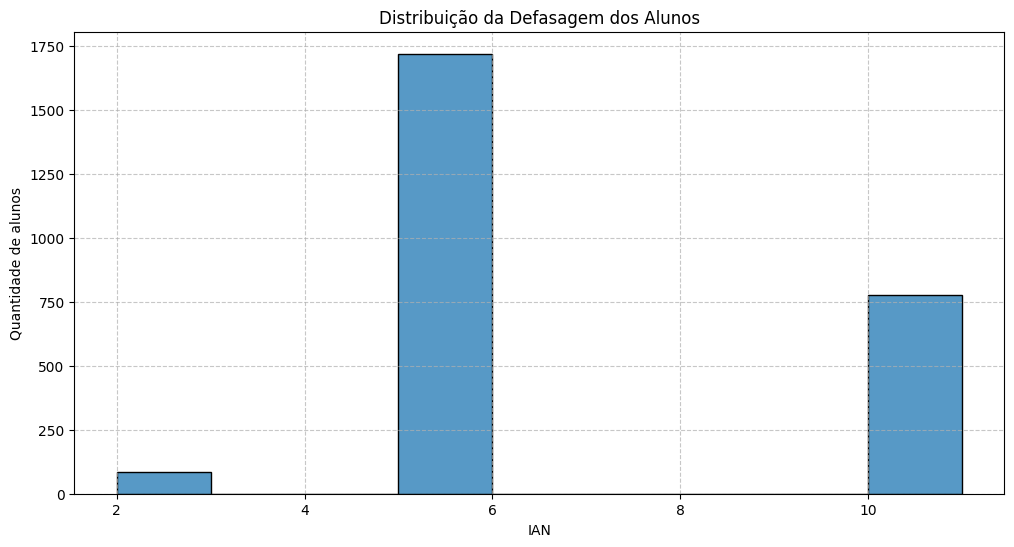

In [121]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='IAN',bins=range(int(df['IAN'].min()), int(df['IAN'].max())),discrete=True)

plt.xlabel("IAN")
plt.ylabel("Quantidade de alunos")
plt.title("Distribuição da Defasagem dos Alunos")
plt.grid(linestyle='--', alpha=0.7)

plt.show()

- maior concentração de alunos com IAN igual a 5

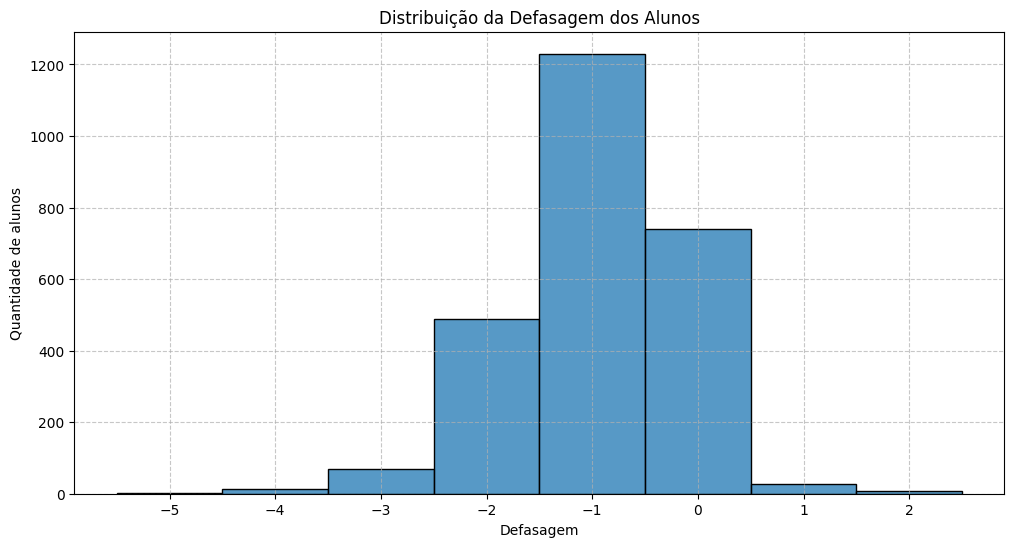

In [122]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='defasagem',bins=range(int(df['defasagem'].min()), int(df['defasagem'].max()) + 2),discrete=True)

plt.xlabel("Defasagem")
plt.ylabel("Quantidade de alunos")
plt.title("Distribuição da Defasagem dos Alunos")
plt.grid(linestyle='--', alpha=0.7)

plt.show()

In [123]:
agg_df_count = df.groupby(['defasagem'])['RA'].count().reset_index()
agg_df_count['percentual [%]'] = round(agg_df_count['RA']/agg_df_count['RA'].sum()*100,2)
agg_df_count

,defasagem,RA,percentual [%]
0,-5,3,0.12
1,-4,12,0.47
2,-3,69,2.67
3,-2,489,18.95
4,-1,1230,47.67
5,0,741,28.72
6,1,27,1.05
7,2,9,0.35


- Maior concentração de jovem com pelo menos 1 nivel de defagem 47,67%
- Apenas 28,72% encontra-se no nivel ideal

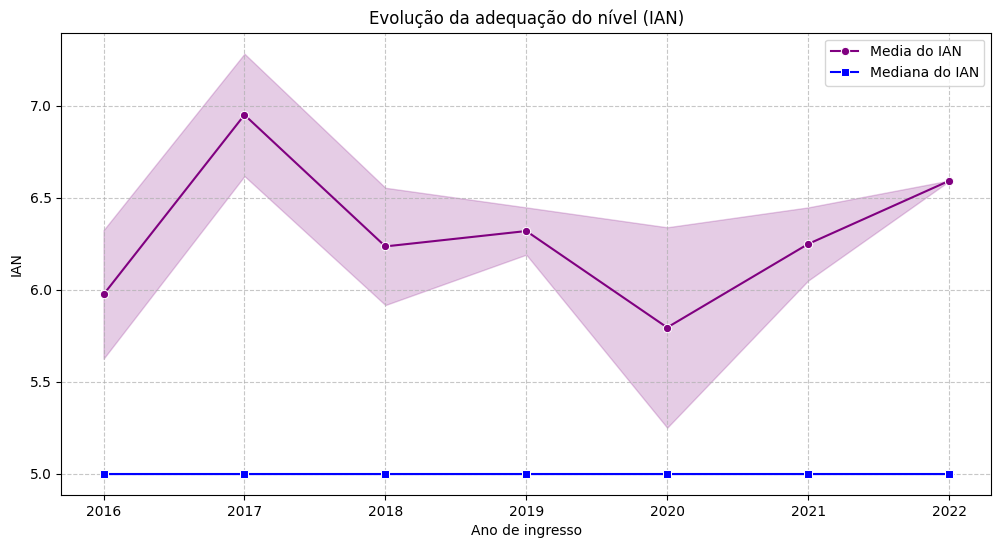

In [125]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=agg_df_mean, x='Ano_ingresso', y='IAN', color='purple', marker='o', label='Media do IAN')
sns.lineplot(data=agg_df_median, x='Ano_ingresso', y='IAN', color='blue', marker='s', label='Mediana do IAN')

# Tickets
plt.xlabel("Ano de ingresso")
plt.ylabel("IAN")
plt.title("Evolução da adequação do nível (IAN)")
plt.grid(linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
plt.legend()

plt.show()

- A evolução do indicador IAN apresenta um comportamento oscilatorio. Ao remover o ponto de 2017 e 2020, notamos um leve aumento no indicador.

### 2. Desempenho acadêmico (IDA): O desempenho acadêmico médio (IDA) está melhorando, estagnado ou caindo ao longo das fases e anos?

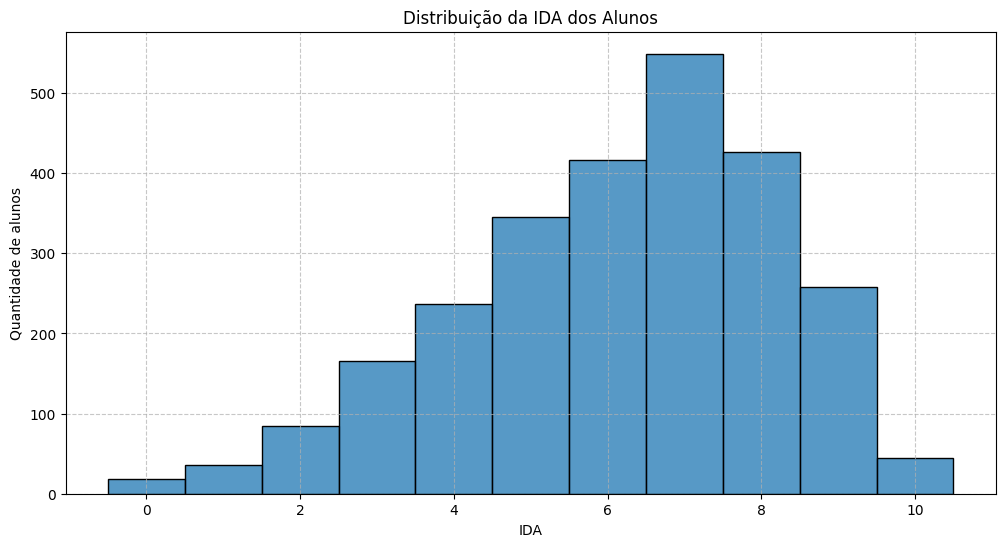

In [129]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='IDA',bins=range(int(df['IDA'].min()), int(df['IDA'].max())),discrete=True)

plt.xlabel("IDA")
plt.ylabel("Quantidade de alunos")
plt.title("Distribuição da IDA dos Alunos")
plt.grid(linestyle='--', alpha=0.7)

plt.show()

In [132]:
df_IDA = df
df_IDA['IDA'] = round(df['IDA'],0)
agg_df_count = df_IDA.groupby(['IDA'])['RA'].count().reset_index()
agg_df_count['percentual [%]'] = round(agg_df_count['RA']/agg_df_count['RA'].sum()*100,2)
agg_df_count

,IDA,RA,percentual [%]
0,0.0,18,0.70
1,1.0,36,1.40
2,2.0,111,4.30
3,3.0,138,5.35
4,4.0,270,10.47
5,5.0,312,12.09
6,6.0,483,18.72
7,7.0,483,18.72
8,8.0,468,18.14
9,9.0,216,8.37


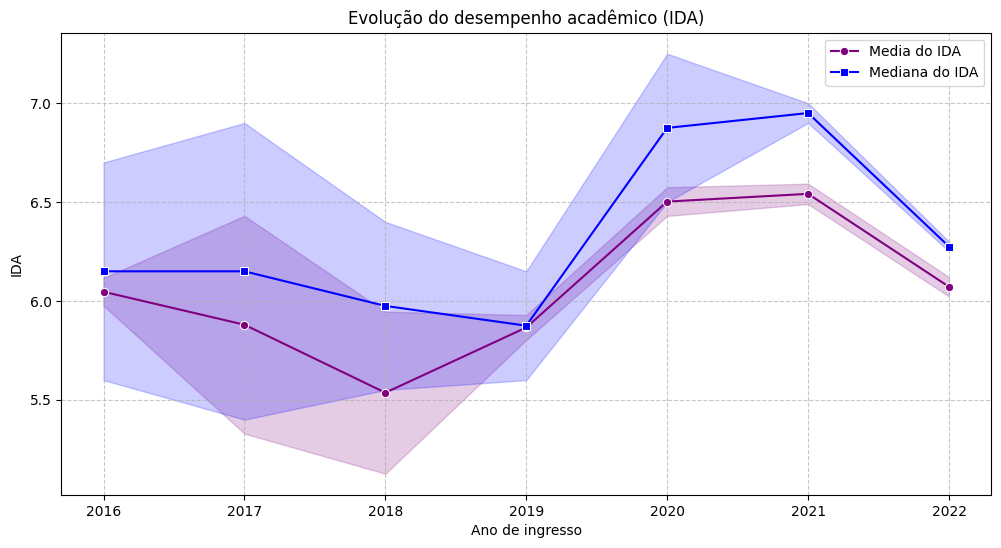

In [126]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=agg_df_mean, x='Ano_ingresso', y='IDA',  color='purple', marker='o', label='Media do IDA')
sns.lineplot(data=agg_df_median, x='Ano_ingresso', y='IDA', color='blue', marker='s', label='Mediana do IDA')

# Tickets
plt.xlabel("Ano de ingresso")
plt.ylabel("IDA")
plt.title("Evolução do desempenho acadêmico (IDA)")
plt.grid(linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
plt.legend()

plt.show()

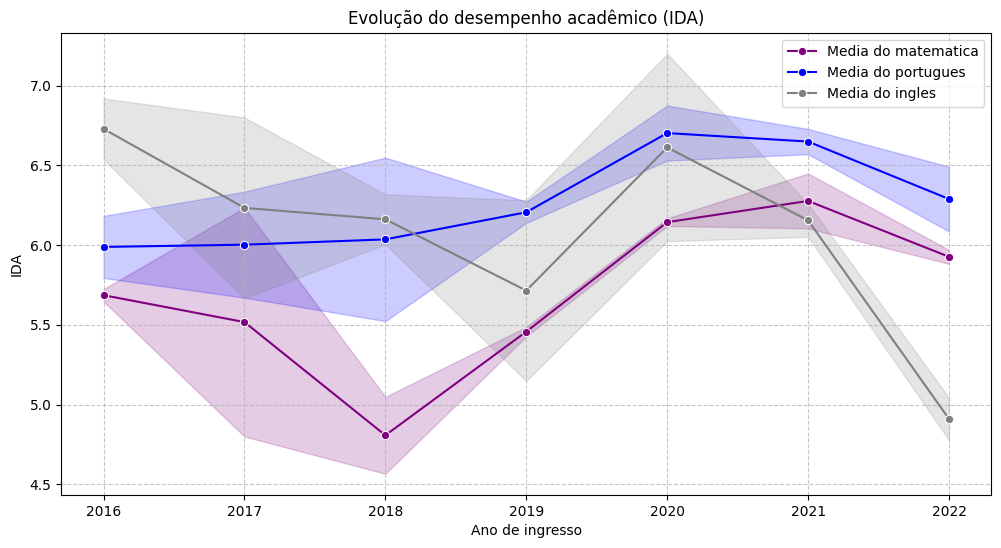

In [137]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=agg_df_mean, x='Ano_ingresso', y='matematica',  color='purple', marker='o', label='Media do matematica')
sns.lineplot(data=agg_df_mean, x='Ano_ingresso', y='portugues',  color='blue', marker='o', label='Media do portugues')
sns.lineplot(data=agg_df_mean, x='Ano_ingresso', y='ingles',  color='gray', marker='o', label='Media do ingles')


# Tickets
plt.xlabel("Ano de ingresso")
plt.ylabel("IDA")
plt.title("Evolução do desempenho acadêmico (IDA)")
plt.grid(linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
plt.legend()

plt.show()

### 3.Engajamento nas atividades (IEG): O grau de engajamento dos alunos (IEG) tem relação direta com seus indicadores de desempenho (IDA) e do ponto de virada (IPV)?

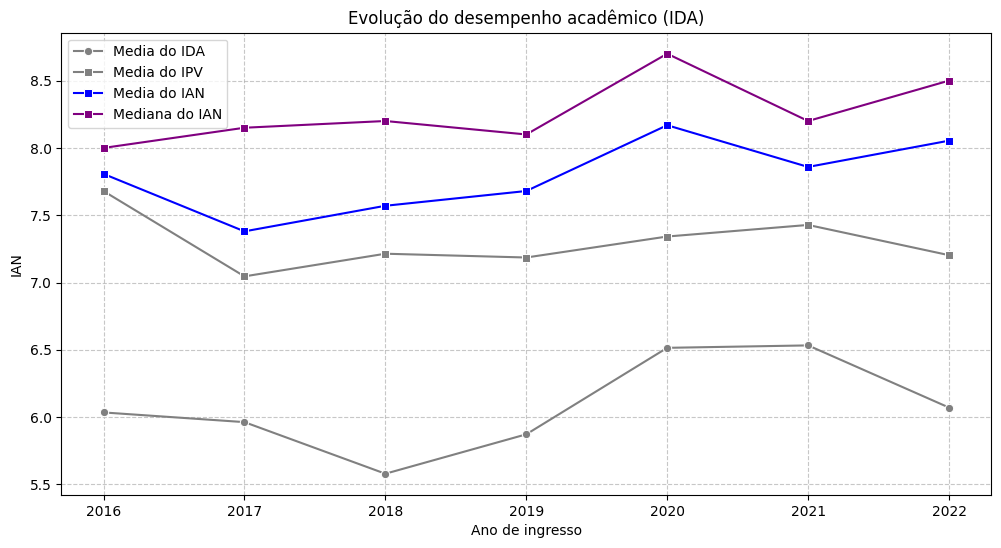

In [19]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IDA', color='gray', marker='o', label='Media do IDA')
sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IPV', color='gray', marker='s', label='Media do IPV')
sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IEG', color='blue', marker='s', label='Media do IAN')
sns.lineplot(data=agg_df_median, x=agg_df_median.index, y='IEG', color='purple', marker='s', label='Mediana do IAN')



# Tickets
plt.xlabel("Ano de ingresso")
plt.ylabel("IAN")
plt.title("Evolução do desempenho acadêmico (IDA)")
plt.grid(linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
plt.legend()

plt.show()

### 4. Autoavaliação (IAA): As percepções dos alunos sobre si mesmos (IAA) são coerentes com seu desempenho real (IDA) e engajamento (IEG)?

### 5. Aspectos psicossociais (IPS): Há padrões psicossociais (IPS) que antecedem quedas de desempenho acadêmico ou de engajamento?

### 6. Aspectos psicopedagógicos (IPP): As avaliações psicopedagógicas (IPP) confirmam ou contradizem a defasagem identificada pelo IAN?


### 7. Ponto de virada (IPV): Quais comportamentos - acadêmicos, emocionais ou de engajamento - mais influenciam o IPV ao longo do tempo?

### 8. Multidimensionalidade dos indicadores: Quais combinações de indicadores (IDA + IEG + IPS + IPP) elevam mais a nota global do aluno (INDE)?

### 9. Previsão de risco com Machine Learning: Quais padrões nos indicadores permitem identificar alunos em risco antes de queda no desempenho ou aumento da defasagem? Construa um modelo preditivo que mostre uma probabilidade do aluno ou aluna entrar em risco de defasagem.

### 10. Efetividade do programa: Os indicadores mostram melhora consistente ao longo do ciclo nas diferentes fases (Quartzo, Ágata, Ametista e Topázio), confirmando o impacto real do programa?

### 11. Insights e criatividade: Você pode adicionar mais insights e pontos de vista não abordados nas perguntas, utilize a criatividade e a análise dos dados para trazer sugestões para a Passos Mágicos